In [61]:
import os
import getpass
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
question_significance = {
    "seating_question_1": "Salt or Paprika?",
    "seating_question_2": "Which starter pokemon would you choose?",
    "seating_question_3": "Which Hogward house are you?",
    "seating_question_4": "Ideal friday evening?",
    "seating_question_5": "What's your favorite drink?",
    "seating_question_6": "What is most likely to exist?",
    "seating_question_7": "What is the best aroma?",
    "seating_question_8": "What where we talking about?",
    "seating_question_9": "What is your favoured language?",
    "seating_question_10": "Who do you prefer?",
}

In [5]:

server = "ec2-54-72-196-9.eu-west-1.compute.amazonaws.com"
db = "d2fect8juldk3k"
user = "puybkltrealynp"
pswd = getpass.getpass(prompt="Enter password: ")
pswd_to_enter = "10aefdea5dcd6a4366ab1e0f46cbf91366144b7a3ad7252478db2c63357fec4e"
# Set the PGPASSWORD environment variable
os.environ['PGPASSWORD'] = pswd

# Execute the PostgreSQL command without specifying the password
os.system(f"psql -h {server} -U {user} -d {db} -c 'SELECT name, email, name, family_name, seating_question_1, seating_question_2, seating_question_3, seating_question_4, seating_question_5, seating_question_6, seating_question_7, seating_question_8, seating_question_9, seating_question_10, seating_question_11, seating_question_12, seating_question_13, seating_question_14, seating_question_15 FROM users;' -o seatings.csv")


Enter password:  ········


0

In [35]:
full_csv = pd.read_csv(f"seatings.csv", delimiter="|")
# Strip leading and trailing spaces from every element in the DataFrame
full_csv = full_csv.applymap(lambda x: x.strip() if isinstance(x, str) else x)
full_csv.columns = full_csv.columns.str.strip()
full_csv = full_csv.dropna()

/tmp/ipykernel_3821/2183413473.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_csv = full_csv.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [36]:
full_csv

,name,email,name .1,family_name,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
1,Sunshine,alexr89@hotmail.fr,Sunshine,Renie,,,,,,,,,,,,,,,
2,Fransozich,fdelimburg@gmail.com,Fransozich,de Limburg Stirum,,,,,,,,,,,,,,,
3,Isa,isalinebaudry@hotmail.com,Isa,Baudry,,,,,,,,,,,,,,,
4,Hortish,hortensevincotte@gmail.com,Hortish,de Brouwer,,,,,,,,,,,,,,,
5,MV,mvlvputbus@gmail.com,MV,d'Ursel,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Laurence,laurence.de.guerre@gmail.com,Laurence,,01_paprika,02_bulbasaur,03_ravenclaw,04_tabletop,05_tea,06_god,07_chocolate,08_icecream,09_france,10_love_liv,,,,,
217,Marloes,mpwesterwoudt@gmail.com,Marloes,Westerwoudt,01_paprika,02_charmander,03_gryffondor,04_tabletop,05_wine,06_ghost,07_pistachio,08_icecream,09_netherlands,10_love_liv,,,,,
218,Thommie,thom.hendriks@gmail.com,Thommie,Hendriks,01_paprika,02_squirtle,03_huffelpuf,04_clubbing,05_beer,06_nessie,07_pepper,08_sex,09_unitedkingdom,10_love_liv,,,,,
219,Eugénie,eugenie_stinglhamber@hotmail.com,Eugénie,Stinglhamber,01_salt,02_bulbasaur,03_huffelpuf,04_browncafe,05_beer,06_aliens,07_pistachio,08_sex,09_france,10_love_liv,,,,,


In [40]:
only_answered = full_csv[full_csv["seating_question_1"].str.strip() != ""]
only_answered

,name,email,name .1,family_name,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
19,Erica,erica.efst@gmail.com,Erica,Efstratoudakis,01_salt,02_squirtle,03_gryffondor,04_browncafe,05_wine,06_aliens,07_chocolate,08_icecream,09_unitedkingdom,10_love_liv,,,,,
20,Caroline,carolinewvh@gmail.com,Caroline,Wesselman van Helmond,01_paprika,02_squirtle,03_huffelpuf,04_clubbing,05_tea,06_ghost,07_chocolate,08_icecream,09_unitedkingdom,10_love_math,,,,,
45,Theresa,theresaisabelkruse@gmail.com,Theresa,Kruse,01_salt,02_squirtle,03_ravenclaw,04_clubbing,05_gin,06_nessie,07_pistachio,08_spices,09_germany,10_love_math,,,,,
46,Catalina,catalina.de.schrevel@hotmail.com,Catalina,De Schrevel,01_paprika,02_charmander,03_slitherin,04_browncafe,05_beer,06_nessie,07_pepper,08_icecream,09_belgium,10_love_math,,,,,
47,Adri,amiel.hadrien@gmail.com,Adri,,01_paprika,02_bulbasaur,03_slitherin,04_browncafe,05_beer,06_reptilian,07_chocolate,08_icecream,09_france,10_love_math,,,,,
71,Felix,fvanlitsenburg@gmail.com,Felix,van Litsenburg,01_salt,02_squirtle,03_gryffondor,04_browncafe,05_coffee,06_ghost,07_chocolate,08_icecream,09_unitedkingdom,10_love_math,,,,,
76,Samie,sammie.katt@gmail.com,Samie,,01_paprika,02_bulbasaur,03_slitherin,04_clubbing,05_beer,06_ghost,07_vanilla,08_icecream,09_unitedkingdom,10_love_liv,,,,,
78,Molly,ohman.molly@gmail.com,Molly,Ohman,01_salt,,,,,,,,,,,,,,
91,Anne Sophie,annesophievv@hotmail.com,Anne Sophie,Van Vegchel,01_salt,02_squirtle,03_gryffondor,04_browncafe,05_beer,06_nessie,07_chocolate,08_icecream,09_netherlands,10_love_liv,,,,,
93,Philibert,deloozphil@gmail.com,Philibert,De looz,01_paprika,02_charmander,03_huffelpuf,04_clubbing,05_whisky,06_ghost,07_pepper,08_sex,09_france,10_love_math,,,,,


In [39]:
len(only_answered)

52

In [41]:
only_seating_colls = only_answered[["seating_question_1","seating_question_2","seating_question_3","seating_question_4","seating_question_5","seating_question_6","seating_question_7","seating_question_8","seating_question_9","seating_question_10"]]

In [77]:
only_seating_colls = only_seating_colls.applymap(lambda x: str(x).split('_')[-1])
only_seating_colls

/tmp/ipykernel_3821/3154747277.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  only_seating_colls = only_seating_colls.applymap(lambda x: str(x).split('_')[-1])


,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10
19,salt,squirtle,gryffondor,browncafe,wine,aliens,chocolate,icecream,unitedkingdom,liv
20,paprika,squirtle,huffelpuf,clubbing,tea,ghost,chocolate,icecream,unitedkingdom,math
45,salt,squirtle,ravenclaw,clubbing,gin,nessie,pistachio,spices,germany,math
46,paprika,charmander,slitherin,browncafe,beer,nessie,pepper,icecream,belgium,math
47,paprika,bulbasaur,slitherin,browncafe,beer,reptilian,chocolate,icecream,france,math
71,salt,squirtle,gryffondor,browncafe,coffee,ghost,chocolate,icecream,unitedkingdom,math
76,paprika,bulbasaur,slitherin,clubbing,beer,ghost,vanilla,icecream,unitedkingdom,liv
78,salt,,,,,,,,,
91,salt,squirtle,gryffondor,browncafe,beer,nessie,chocolate,icecream,netherlands,liv
93,paprika,charmander,huffelpuf,clubbing,whisky,ghost,pepper,sex,france,math


In [78]:
full_csv.head(79).tail(3)

,name,email,name .1,family_name,seating_question_1,seating_question_2,seating_question_3,seating_question_4,seating_question_5,seating_question_6,seating_question_7,seating_question_8,seating_question_9,seating_question_10,seating_question_11,seating_question_12,seating_question_13,seating_question_14,seating_question_15
77,Marisa,marisa.reddy@gmail.com,Marisa,,,,,,,,,,,,,,,,
78,Molly,ohman.molly@gmail.com,Molly,Ohman,01_salt,,,,,,,,,,,,,,
79,Phil,philippe.labouchere@gmail.com,Phil,,,,,,,,,,,,,,,,


In [79]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(only_seating_colls)

In [80]:
one_hot_encoded = pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out())

In [81]:
# For example, let's say you want to reduce the dimensionality to 2 components
pca = PCA(n_components=2)

# Fit the PCA model to your one-hot encoded DataFrame
pca.fit(one_hot_encoded)

# Transform the data to its principal components
pca_result = pca.transform(one_hot_encoded)

# Create a new DataFrame to store the principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [112]:
current_question = "seating_question_8"
signify = question_significance[current_question]
signify

'What where we talking about?'

In [113]:
pca_df[signify] = list(only_seating_colls[current_question])

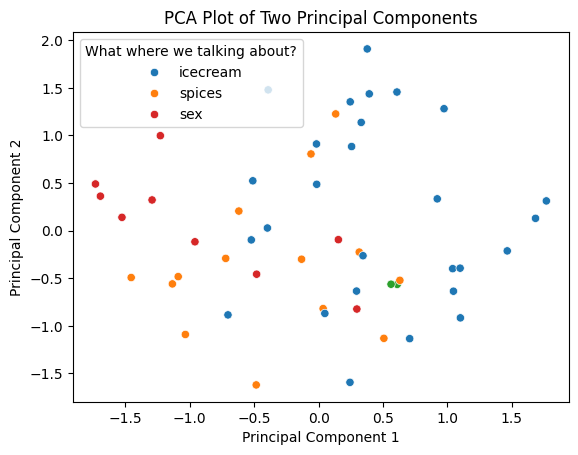

In [114]:
# Create a scatter plot using Seaborn
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue = signify)
plt.title('PCA Plot of Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()